In [40]:
#conda install geopandas

In [41]:
#import programs
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
from numpy import random
from shapely.geometry import Point
%matplotlib inline

In [42]:
#pip install --user geopandas

In [43]:
random.randint(0, 101)

0

In [44]:
# to import the raw data into pandas
SARASFOEMS = pd.read_csv('Sara_Test_Data.csv', header=0)
SARASFOEMS.head()


,Address,IncidentDate,Incident day,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,Diff_1,...,EMSUnits,EMSPersonnel,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict
0,Bush St/polk Street,1/1/2016,Friday,1/1/2016,22:10:42,1/1/2016,22:10:42,1/1/2016,23:29:41,0,...,0,0,0,0,322,EMS,motor vehicle accident with injuries,n none,3.0,Nob Hill
1,Polk St/mcallister Street,1/1/2016,Friday,1/1/2016,23:29:11,1/1/2016,23:29:11,1/2/2016,0:48:06,0,...,4,6,0,0,300,EMS,"rescue, ems incident, other",n none,6.0,Tenderloin
2,500 Clarendon Avenue,1/1/2016,Friday,1/1/2016,16:52:54,1/1/2016,16:52:54,1/1/2016,16:57:21,0,...,0,0,0,0,522,Service,water or steam leak,n none,7.0,Inner Sunset
3,Hiliritas Av/diamond Street,1/1/2016,Friday,1/1/2016,22:43:23,1/1/2016,22:43:23,1/1/2016,22:43:32,0,...,0,0,0,0,520,Service,"water problem, other",n none,8.0,Glen Park
4,California St/larkin Street,1/1/2016,Friday,1/1/2016,1:25:19,1/1/2016,1:25:19,1/1/2016,1:28:57,0,...,0,0,0,0,324,EMS,motor vehicle accident with no injuries.,n none,3.0,Nob Hill


In [45]:
SARASFOEMS.dtypes

Address                  object
IncidentDate             object
Incident day             object
AlarmDt                  object
AlarmTm                  object
ArrivalDt                object
ArrivalTm                object
CloseDt                  object
CloseTm                  object
Diff_1                    int64
Time_cut_1                int64
Diff_2                    int64
Zipcode                   int64
geometry                 object
Battalion                object
StationArea             float64
SuppressionUnits          int64
SuppressionPersonnel      int64
EMSUnits                  int64
EMSPersonnel              int64
OtherUnits                int64
OtherPersonnel            int64
Primary                   int64
Category                 object
PrimarySituation         object
MutualAid                object
SupervisorDistrict      float64
NeighborhoodDistrict     object
dtype: object

In [46]:
# extract month from Indcident Date column and add month column
SARASFOEMS['month'] = pd.DatetimeIndex(SARASFOEMS['IncidentDate']).month
SARASFOEMS.head()

,Address,IncidentDate,Incident day,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,Diff_1,...,EMSPersonnel,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month
0,Bush St/polk Street,1/1/2016,Friday,1/1/2016,22:10:42,1/1/2016,22:10:42,1/1/2016,23:29:41,0,...,0,0,0,322,EMS,motor vehicle accident with injuries,n none,3.0,Nob Hill,1
1,Polk St/mcallister Street,1/1/2016,Friday,1/1/2016,23:29:11,1/1/2016,23:29:11,1/2/2016,0:48:06,0,...,6,0,0,300,EMS,"rescue, ems incident, other",n none,6.0,Tenderloin,1
2,500 Clarendon Avenue,1/1/2016,Friday,1/1/2016,16:52:54,1/1/2016,16:52:54,1/1/2016,16:57:21,0,...,0,0,0,522,Service,water or steam leak,n none,7.0,Inner Sunset,1
3,Hiliritas Av/diamond Street,1/1/2016,Friday,1/1/2016,22:43:23,1/1/2016,22:43:23,1/1/2016,22:43:32,0,...,0,0,0,520,Service,"water problem, other",n none,8.0,Glen Park,1
4,California St/larkin Street,1/1/2016,Friday,1/1/2016,1:25:19,1/1/2016,1:25:19,1/1/2016,1:28:57,0,...,0,0,0,324,EMS,motor vehicle accident with no injuries.,n none,3.0,Nob Hill,1


In [47]:
#To create a dictionary of month number to month name
month_name = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8:
          'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
print(month_name)

{1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


In [48]:
#To add month_name column to df using append
SARASFOEMS['Month Name']=SARASFOEMS['month'].map(month_name)
SARASFOEMS.tail()

,Address,IncidentDate,Incident day,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,Diff_1,...,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month,Month Name
63519,345 Arguello Bl 310,3/27/2016,Sunday,3/27/2016,11:31:19,3/27/2016,13:23:37,3/27/2016,13:38:21,6738,...,0,0,331,EMS,"lock-in (if lock out , use 511 )",n none,1.0,Inner Richmond,3,Mar
63520,42 Washburn Street,1/5/2017,Thursday,1/5/2017,23:47:03,1/6/2017,2:37:43,1/6/2017,2:37:52,10240,...,0,0,733,False Alarm,smoke detector activation due to malfunction,n none,6.0,South of Market,1,Jan
63521,501 Tunnel Avenue,5/27/2016,Friday,5/27/2016,7:15:22,5/27/2016,10:35:16,5/27/2016,10:54:55,11994,...,0,0,730,False Alarm,"system malfunction, other",n none,10.0,Bayview Hunters Point,5,May
63522,NaN,10/6/2016,Thursday,10/6/2016,10:10:00,10/6/2016,16:40:01,10/6/2016,17:00:52,23401,...,0,0,322,EMS,motor vehicle accident with injuries,n none,9.0,Portola,10,Oct
63523,0 Executive Park Bl,8/1/2017,Tuesday,8/1/2017,21:21:10,8/2/2017,5:22:03,8/2/2017,6:08:14,28853,...,0,0,551,Service,assist police or other governmental agency,n none,10.0,Bayview Hunters Point,8,Aug


In [49]:
#To create a dictionary of month to seasons
season = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8:
          'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
print(season)

{1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}


In [50]:
#To add season column to df using append
SARASFOEMS['Season']=SARASFOEMS['month'].map(season)
SARASFOEMS.tail()

,Address,IncidentDate,Incident day,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,Diff_1,...,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month,Month Name,Season
63519,345 Arguello Bl 310,3/27/2016,Sunday,3/27/2016,11:31:19,3/27/2016,13:23:37,3/27/2016,13:38:21,6738,...,0,331,EMS,"lock-in (if lock out , use 511 )",n none,1.0,Inner Richmond,3,Mar,Spring
63520,42 Washburn Street,1/5/2017,Thursday,1/5/2017,23:47:03,1/6/2017,2:37:43,1/6/2017,2:37:52,10240,...,0,733,False Alarm,smoke detector activation due to malfunction,n none,6.0,South of Market,1,Jan,Winter
63521,501 Tunnel Avenue,5/27/2016,Friday,5/27/2016,7:15:22,5/27/2016,10:35:16,5/27/2016,10:54:55,11994,...,0,730,False Alarm,"system malfunction, other",n none,10.0,Bayview Hunters Point,5,May,Spring
63522,NaN,10/6/2016,Thursday,10/6/2016,10:10:00,10/6/2016,16:40:01,10/6/2016,17:00:52,23401,...,0,322,EMS,motor vehicle accident with injuries,n none,9.0,Portola,10,Oct,Fall
63523,0 Executive Park Bl,8/1/2017,Tuesday,8/1/2017,21:21:10,8/2/2017,5:22:03,8/2/2017,6:08:14,28853,...,0,551,Service,assist police or other governmental agency,n none,10.0,Bayview Hunters Point,8,Aug,Summer


(4000, 6000)

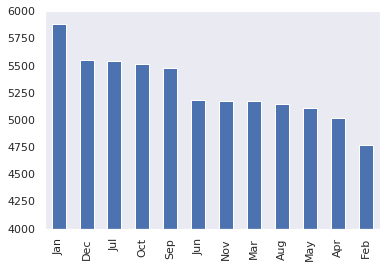

In [51]:
#to calculate calls by month
month_calls=SARASFOEMS['Month Name'].value_counts().plot(kind='bar', grid=False)
plt.ylim(4000,6000)

In [52]:
#To create a dictionary of weekday vs. weekend
weekday_vs_weekend = {'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday', 'Saturday': 'Weekend', 'Sunday': 'Weekend'}
print(weekday_vs_weekend)

{'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday', 'Saturday': 'Weekend', 'Sunday': 'Weekend'}


In [53]:
#To add day type column to df using append
SARASFOEMS['Day Type']=SARASFOEMS['Incident day'].map(weekday_vs_weekend)
SARASFOEMS.head(25)

,Address,IncidentDate,Incident day,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,Diff_1,...,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month,Month Name,Season,Day Type
0,Bush St/polk Street,1/1/2016,Friday,1/1/2016,22:10:42,1/1/2016,22:10:42,1/1/2016,23:29:41,0,...,322,EMS,motor vehicle accident with injuries,n none,3.0,Nob Hill,1,Jan,Winter,Weekday
1,Polk St/mcallister Street,1/1/2016,Friday,1/1/2016,23:29:11,1/1/2016,23:29:11,1/2/2016,0:48:06,0,...,300,EMS,"rescue, ems incident, other",n none,6.0,Tenderloin,1,Jan,Winter,Weekday
2,500 Clarendon Avenue,1/1/2016,Friday,1/1/2016,16:52:54,1/1/2016,16:52:54,1/1/2016,16:57:21,0,...,522,Service,water or steam leak,n none,7.0,Inner Sunset,1,Jan,Winter,Weekday
3,Hiliritas Av/diamond Street,1/1/2016,Friday,1/1/2016,22:43:23,1/1/2016,22:43:23,1/1/2016,22:43:32,0,...,520,Service,"water problem, other",n none,8.0,Glen Park,1,Jan,Winter,Weekday
4,California St/larkin Street,1/1/2016,Friday,1/1/2016,1:25:19,1/1/2016,1:25:19,1/1/2016,1:28:57,0,...,324,EMS,motor vehicle accident with no injuries.,n none,3.0,Nob Hill,1,Jan,Winter,Weekday
5,906 Capp Street,1/2/2016,Saturday,1/2/2016,22:50:09,1/2/2016,22:50:09,1/2/2016,23:19:36,0,...,151,Fire,"outside rubbish, trash or waste fire",n none,9.0,Mission,1,Jan,Winter,Weekend
6,3316 24th Street,1/2/2016,Saturday,1/2/2016,22:20:12,1/2/2016,22:20:12,1/2/2016,22:21:22,0,...,160,Fire,"special outside fire, other",n none,9.0,Mission,1,Jan,Winter,Weekend
7,36 Bluxome Street,1/3/2016,Sunday,1/3/2016,10:58:57,1/3/2016,10:58:57,1/3/2016,11:15:35,0,...,311,EMS,"medical assist, assist ems crew",n none,6.0,South of Market,1,Jan,Winter,Weekend
8,236 18th Avenue,1/3/2016,Sunday,1/3/2016,15:02:29,1/3/2016,15:02:29,1/3/2016,15:24:40,0,...,550,Service,"public service assistance, other",n none,1.0,Outer Richmond,1,Jan,Winter,Weekend
9,1 Sf Intl Airport,1/3/2016,Sunday,1/3/2016,21:46:42,1/3/2016,21:46:42,1/3/2016,21:46:42,0,...,324,EMS,motor vehicle accident with no injuries.,n none,NaN,NaN,1,Jan,Winter,Weekend


(15000, 16500)

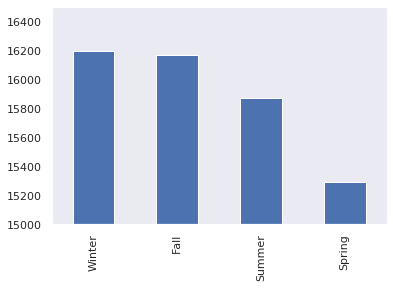

In [54]:
#to calculate calls by season
month_calls=SARASFOEMS['Season'].value_counts().plot(kind='bar', grid=False)
plt.ylim(15000,16500)

(8000, 10000)

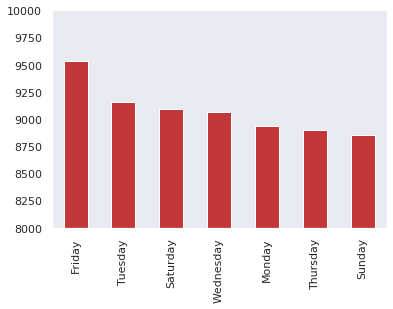

In [55]:
#to calculate calls by day of week
sns.set_palette('RdBu')
month_calls=SARASFOEMS['Incident day'].value_counts().plot(kind='bar', grid=False)
plt.ylim(8000,10000)

(8000, 10000)

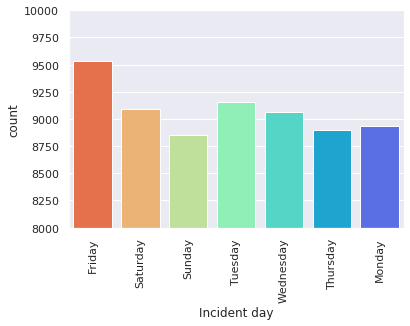

In [56]:
#to calculate number of calls by day - for staffing purposes
month_calls=sns.countplot(x='Incident day', data=SARASFOEMS, palette='rainbow_r')
plt.xticks(rotation=90)
plt.ylim(8000,10000)

In [57]:
#zip_calls = pd.pivot_table(SFOEMS,values='Primary',index=['Category'], columns='Zipcode')
#sns.heatmap(SFOEMS,cmap='YlGnBu')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

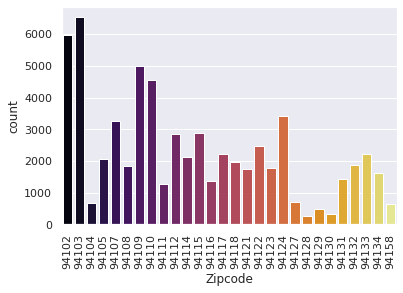

In [58]:
#to calculate number of calls by zip code - for staffing purposes
month_calls=sns.countplot(x='Zipcode', data=SARASFOEMS, palette='inferno')
plt.xticks(rotation=90)
#plt.ylim(8000,10000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

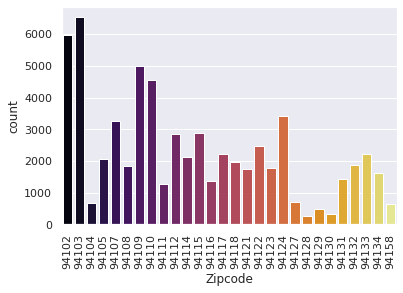

In [59]:
#to calculate number of calls by zip code - for staffing purposes
month_calls=sns.countplot(x='Zipcode', data=SARASFOEMS, palette='inferno')
plt.xticks(rotation=90)
#plt.ylim(8000,10000)

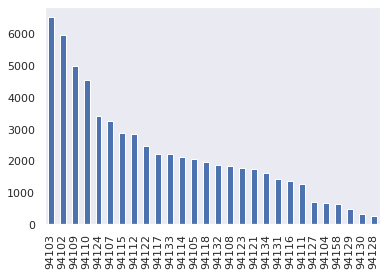

In [60]:
#to calculate calls by zip code
sns.set(color_codes=True)
month_calls=SARASFOEMS['Zipcode'].value_counts().plot(kind='bar', grid=False)
#plt.ylim(8000,10000)

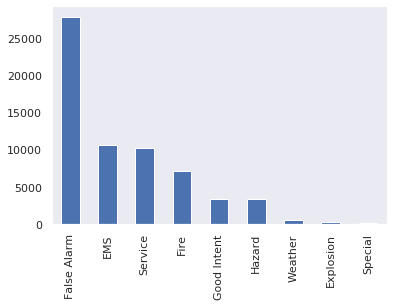

In [61]:
#to take the top 4 zip codes from above chart

sns.set(color_codes=True)
month_calls=SARASFOEMS['Category'].value_counts().plot(kind='bar', grid=False)
#plt.ylim(8000,10000)

In [23]:
# create a seperate dataframe for top 4 zipcodes - zip1: 94103
top_zip1= SARASFOEMS.loc[SARASFOEMS['Zipcode'] == 94103]
top_zip1.shape

(6534, 32)

In [24]:
# create a seperate dataframe for top 4 zipcodes - zip2: 94102
top_zip2= SARASFOEMS.loc[SARASFOEMS['Zipcode'] == 94102]
top_zip2.shape

(5962, 32)

In [25]:
# create a seperate dataframe for top 4 zipcodes - zip3: 94109
top_zip3= SARASFOEMS.loc[SARASFOEMS['Zipcode'] == 94109]
top_zip3.shape

(5002, 32)

In [26]:
# create a seperate dataframe for top 4 zipcodes - zip4: 94110
top_zip4= SARASFOEMS.loc[SARASFOEMS['Zipcode'] == 94110]
top_zip4.shape

(4548, 32)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

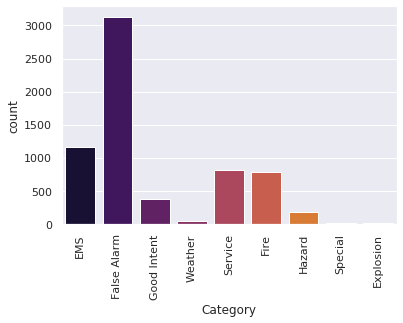

In [27]:
zip1_count=sns.countplot(x='Category', data=top_zip1, palette='inferno')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

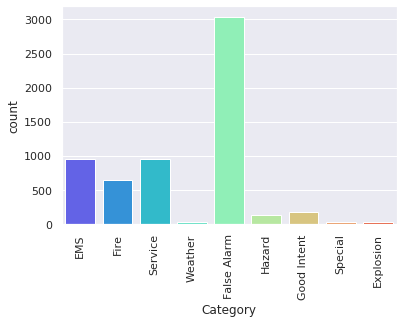

In [28]:
zip2_count=sns.countplot(x='Category', data=top_zip2, palette='rainbow')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

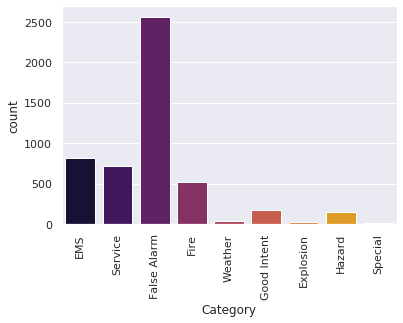

In [29]:
zip3_count=sns.countplot(x='Category', data=top_zip3, palette='inferno')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

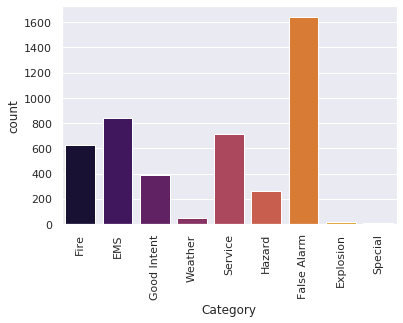

In [30]:
zip4_count=sns.countplot(x='Category', data=top_zip4, palette='inferno')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

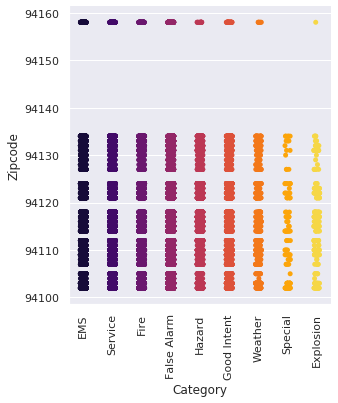

In [31]:
zip1_count2=sns.catplot(x='Category', y='Zipcode', data=SARASFOEMS, palette='inferno')
plt.xticks(rotation=90)

In [34]:
#to show heatmap
#kde, ax = plt.subplots()
#ax = sns.kdeplot(data = SARASFOEMS['Zipcode'], data2 = SARASFOEMS['EMSPersonnel'], shade = True)
#ax.set_title('Kernel Density Plot of Categories and Zip Codes')
#ax.set_xlabel('Zip Code')
#ax.set_ylabel('EMSPersonnel')
#plt.show()

In [36]:
geo_SFO_EMS = geopandas.GeoDataFrame(SARASFOEMS, geometry='geometry')
geo_SFO_EMS.crs = {'init': 'epsg:4326'}

ValueError: Unknown column geometry

In [37]:
#pip install --user shapely

In [38]:
geo_SFO_EMS = geopandas.GeoDataFrame(SARASFOEMS, geometry='geometry')
geo_SFO_EMS.crs = {'init': 'epsg:4326'}

ValueError: Unknown column geometry

In [39]:
import sys
>>> 'geopandas' in sys.modules

True

In [47]:
#conda install -c conda-forge geopandas

Solving environment: done

## Package Plan ##

  environment location: /opt/tljh/user

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    attrs-19.3.0               |             py_0          35 KB  conda-forge
    boost-cpp-1.70.0           |       ha2d47e9_1        21.1 MB  conda-forge
    bzip2-1.0.8                |       h516909a_1         397 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    cfitsio-3.470              |       hb60a0a2_2         1.4 MB  conda-forge
    click-7.0                  |             py_0          61 KB  conda-forge
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.5.0                |             py_0           8 KB  conda-forge
    curl-7.65.3         